In [1]:
import os
from dotenv import load_dotenv
import torch
from helpers.dataset import load_datasets, create_dataloaders
from helpers.model import CNNImageClassification
from helpers.helper import show_batch
from helpers.train import fit
from helpers.utilities import SaveBestModel, save_model

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"[INFO]: Computation device: {device}\n")

[INFO]: Computation device: cuda:0



In [3]:
load_dotenv()

roboflow_key = os.getenv('roboflow_key')

### Download dataset

In [ ]:
!curl -L "https://universe.roboflow.com/ds/WFOxHVrIFE?key={roboflow_key}" > roboflow.zip; unzip roboflow.zip -d data; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   907  100   907    0     0   1635      0 --:--:-- --:--:-- --:--:--  1640

  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0 17.7M    0 48907    0     0  20027      0  0:15:30  0:00:02  0:15:28 73877
  5 17.7M    5  923k    0     0   270k      0  0:01:07  0:00:03  0:01:04  563k
 72 17.7M   72 12.9M    0     0  2997k      0  0:00:06  0:00:04  0:00:02 5014k
100 17.7M  100 17.7M    0     0  3889k      0  0:00:04  0:00:04 --:--:-- 6278k


In [5]:
image_dirs = {'training_images' : "data/train",
            'validation_images' : "data/valid"}

csv_locations = {'training_data' : 'data/train/_classes.csv',
                'validation_data' : 'data/valid/_classes.csv'}

In [6]:
training_data, validation_data = load_datasets(image_dirs, csv_locations, train=True)

train_dl, val_dl = create_dataloaders(training_data=training_data, validation_data=validation_data, batch_size=128)

[INFO]: Total training images: 267
[INFO]: Total validation images: 77


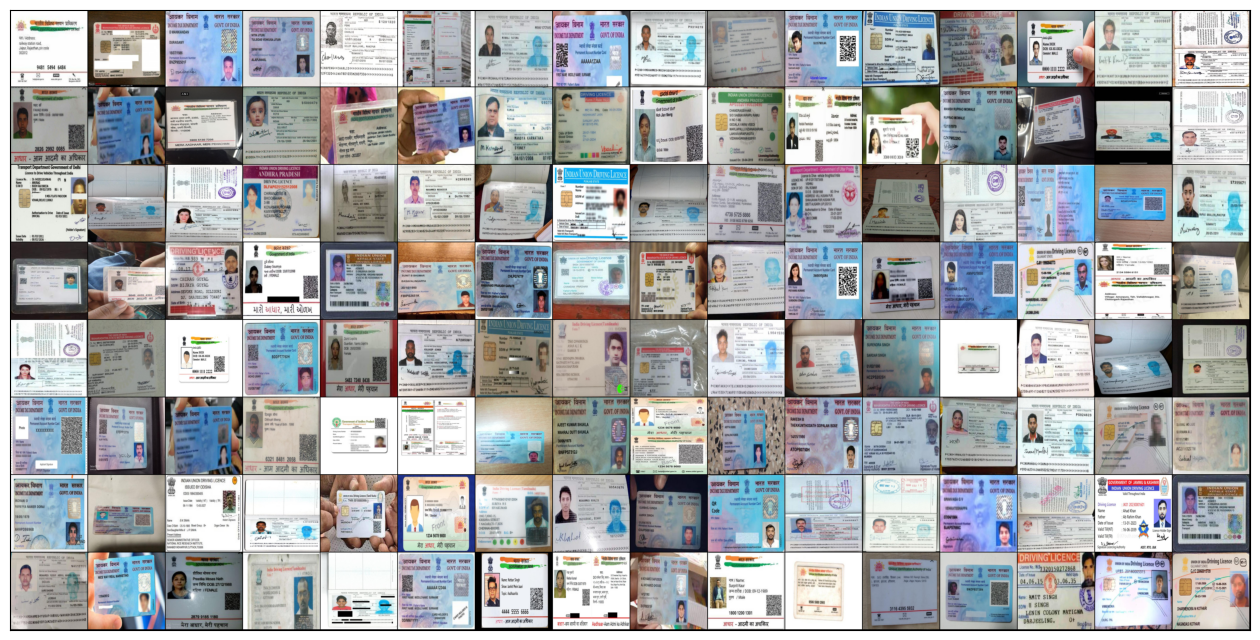

In [7]:
show_batch(train_dl)

### Train model

In [8]:
model = CNNImageClassification(torch.nn.functional.cross_entropy)

In [9]:
num_epochs = 30
lr = 0.001
save_best_model = SaveBestModel()

trained_model, optimizer, history = fit(epochs=num_epochs, learning_rate=lr, model=model, train_loader=train_dl, val_loader=val_dl, device=device, save_best_model=save_best_model)

[INFO]: Epoch [0], train_loss: 1.8708, val_loss: 1.7540, val_acc: 0.8333

[INFO]: Best validation loss: 1.7540283203125

[INFO]: Saving best model for epoch: 1

------------------------------------------------------------------------------

[INFO]: Epoch [1], train_loss: 1.7711, val_loss: 1.7430, val_acc: 0.8333

[INFO]: Best validation loss: 1.7429958581924438

[INFO]: Saving best model for epoch: 2

------------------------------------------------------------------------------

[INFO]: Epoch [2], train_loss: 1.6564, val_loss: 1.6565, val_acc: 0.6775

[INFO]: Best validation loss: 1.6564977169036865

[INFO]: Saving best model for epoch: 3

------------------------------------------------------------------------------

[INFO]: Epoch [3], train_loss: 1.7329, val_loss: 1.6188, val_acc: 0.5844

[INFO]: Best validation loss: 1.6187641620635986

[INFO]: Saving best model for epoch: 4

------------------------------------------------------------------------------

[INFO]: Epoch [4], train_lo

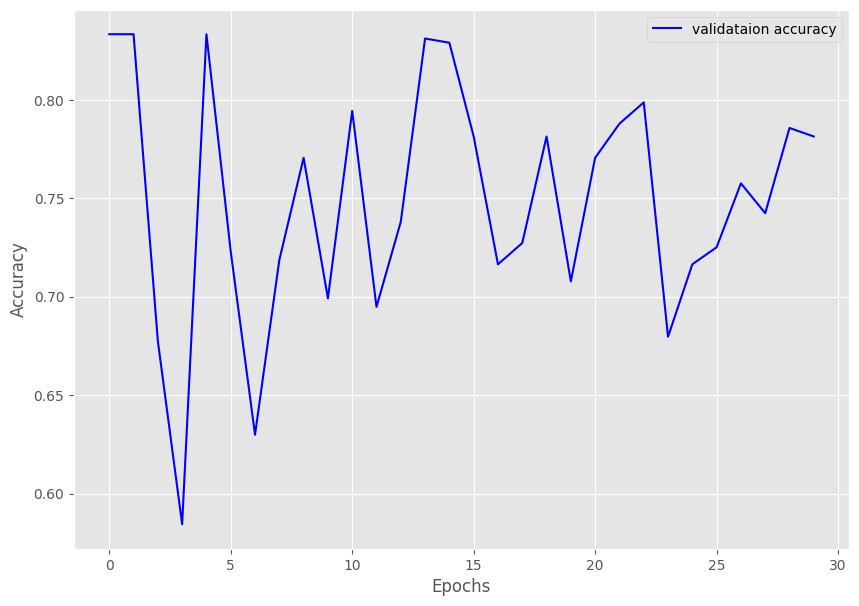

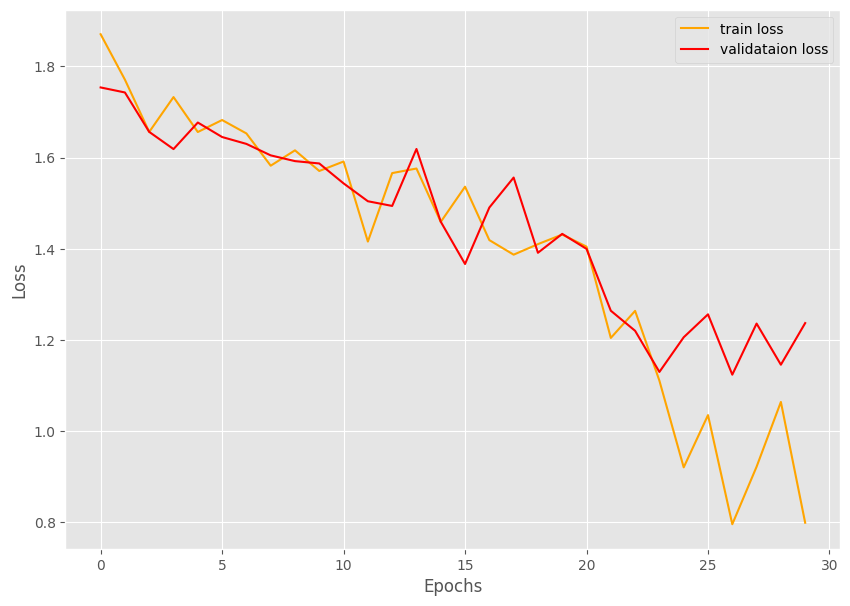

In [10]:
from helpers.plots import draw_acc_loss_plots


draw_acc_loss_plots(history)

In [11]:
trained_model.eval()

CNNImageClassification(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=200704, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linea

### Save model

In [12]:
# to save final model if needed
# save_model(num_epochs, trained_model, optimizer)